In [1]:
#importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# ignore warning
import warnings
warnings.filterwarnings('ignore')
#warnings.filterwarnings(action='once')

### TRAIN DATSET

In [3]:
train = pd.read_csv("train.csv")
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Analyzing our target variable "SalesPrice"

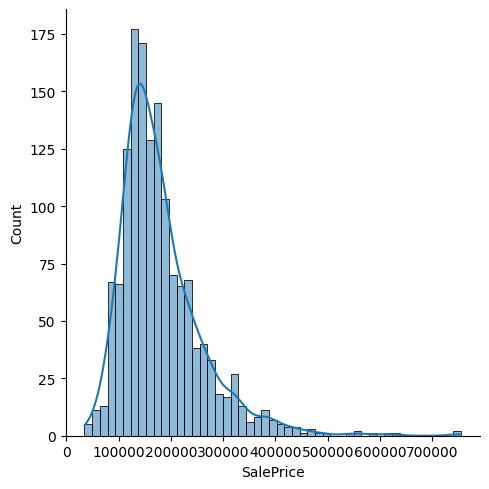

In [5]:
# Histogram
sns.displot(train["SalePrice"],kde=True) 

Checking correlation of features with target variable "SalesPrice"

<Axes: >

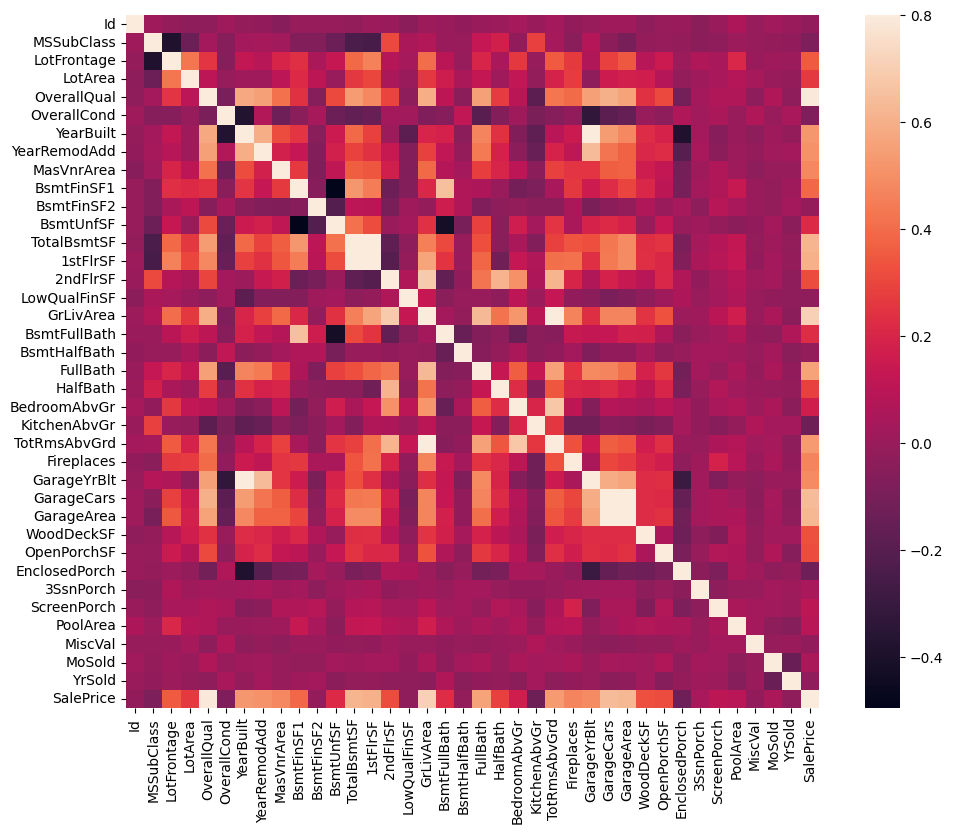

In [6]:
#correlation matrix
plt.figure(figsize=(12,9))
correlation_matrix = train.corr(numeric_only=True)
sns.heatmap(correlation_matrix , vmax=.8, square=True)

- variable which is showing least correlation with salesprice which features doesn't impact the salesprice of the house are : "MSSubClass","OverallCond","BsmtFinSF2","LowQualFinSF","BsmtHalfBath","KitchenAbvGrd","EnclosedPorch","3SsnPorch","PoolArea","MiscVal","MsSold","YrSold"

- "OverallQual", "YearBuilt", "YearRemodAdd", "MasVnrArea","BsmtFinSF1", "TotalBsmtSF","1stFlrSF", "GrLiveArea", "FullBath","TotRmsAbvGrd", "Fireplaces","GarageYrBlt", "GarageCars", "GarageArea" are the variable that are showing major correlation with the "SalePrice"
- "YearBuilt", "GarageYrBlt" and "YearRemodAdd",  are giving same info about the house so we can keep one variable that is "YearBuilt"
- "BsmtFinSF1", "TotalBsmtSF" and"1stFlrSF" also giving same info about the house's basement ares and show multicollinearity, we can one variable that is showing maximum corelation with SalePrice that is TotalBsmtSF
- "GrLiveArea" and "TotRmsAbvGrd" are givig same info and showing multicollinearity, we can one variable that is showing maximum corelation with SalePrice that is "GrLiveArea"
- "GarageCars" and  "GarageArea" are givig same info about house garage detail and showing multicollinearity, we can one variable that is showing maximum corelation with SalePrice that is ""GarageArea""

In [7]:
# we will drop these features which are not affecting our house sale price
train = train.drop(["MSSubClass","OverallCond","BsmtFinSF2","LowQualFinSF","BsmtHalfBath","KitchenAbvGr","EnclosedPorch","3SsnPorch","PoolArea","MiscVal","MoSold","YrSold",
                     "GarageYrBlt","YearRemodAdd","BsmtFinSF1","1stFlrSF","TotRmsAbvGrd","GarageCars"],axis = 1)

### Handle null values

In [8]:
# checking null values and its percentage in every column
train.isnull().mean().sort_values(ascending=False)*100

PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
MasVnrType       59.726027
FireplaceQu      47.260274
LotFrontage      17.739726
GarageType        5.547945
GarageCond        5.547945
GarageFinish      5.547945
GarageQual        5.547945
BsmtExposure      2.602740
BsmtFinType2      2.602740
BsmtFinType1      2.534247
BsmtCond          2.534247
BsmtQual          2.534247
MasVnrArea        0.547945
Electrical        0.068493
HalfBath          0.000000
2ndFlrSF          0.000000
GrLivArea         0.000000
BsmtFullBath      0.000000
SaleCondition     0.000000
FullBath          0.000000
PavedDrive        0.000000
WoodDeckSF        0.000000
SaleType          0.000000
KitchenQual       0.000000
Functional        0.000000
Fireplaces        0.000000
ScreenPorch       0.000000
CentralAir        0.000000
OpenPorchSF       0.000000
GarageArea        0.000000
BedroomAbvGr      0.000000
Id                0.000000
HeatingQC         0.000000
H

-  there is a lot of null values in PoolQC(99.5%), MiscFeature(96.3%), Alley(93.7%), Fence(80.753425%),FireplaceQu(47.260274%)

- Drop missing values( if missing values less than 2-5% of data) 
or may drop the column as well if it has more than 25-30% missing values

In [9]:
# dropping "PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu" column  as it has null values more than 25%
train = train.drop(["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu", "MasVnrType"],axis = 1)

In [10]:
# coverting our null value series in dictionary
null_percentages = train.isnull().mean()*100 
null_percentages=null_percentages.to_dict()

# Create a DataFrame from the dictionary
df_nulls = pd.DataFrame(list(null_percentages.items()), columns=['Column', 'Null_Percentage'])

# Filter columns where the percentage of nulls is less than 5%
columns_with_few_nulls = df_nulls[(df_nulls['Null_Percentage'] > 0) & (df_nulls['Null_Percentage'] < 6)]['Column'].tolist()

# dropping of rows values of column with null values less than 5%  
train.dropna(subset= columns_with_few_nulls,inplace = True)

#####  Replace by Mean/ Median on the basis of Imputation Or Skewness factor, mere for continuous numerical feature which is "LotFrontage" here.

<Figure size 1200x400 with 0 Axes>

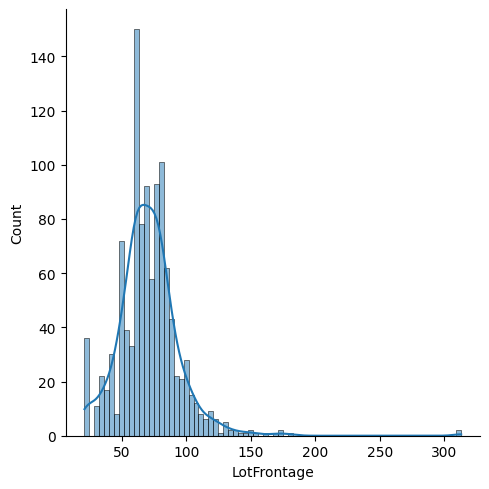

In [11]:
# plotting displot to check skewness
plt.figure(figsize=(12,4))
sns.displot(train["LotFrontage"],kde=True) 

In [12]:
# fill the null value by median for "LotFrontage"
train["LotFrontage"] = train["LotFrontage"].fillna(train["LotFrontage"] .median())

In [13]:
# checking null values and its percentage in every column
#train.isnull().mean()*100

### Handle outliers

In [14]:
train.head()

,Id,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,YearBuilt,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Functional,Fireplaces,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,ScreenPorch,SaleType,SaleCondition,SalePrice
0,1,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,2003,Gable,CompShg,VinylSd,VinylSd,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,150,856,GasA,Ex,Y,SBrkr,854,1710,1,2,1,3,Gd,Typ,0,Attchd,RFn,548,TA,TA,Y,0,61,0,WD,Normal,208500
1,2,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,1976,Gable,CompShg,MetalSd,MetalSd,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,284,1262,GasA,Ex,Y,SBrkr,0,1262,0,2,0,3,TA,Typ,1,Attchd,RFn,460,TA,TA,Y,298,0,0,WD,Normal,181500
2,3,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,2001,Gable,CompShg,VinylSd,VinylSd,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,434,920,GasA,Ex,Y,SBrkr,866,1786,1,2,1,3,Gd,Typ,1,Attchd,RFn,608,TA,TA,Y,0,42,0,WD,Normal,223500
3,4,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,1915,Gable,CompShg,Wd Sdng,Wd Shng,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,540,756,GasA,Gd,Y,SBrkr,756,1717,1,1,0,3,Gd,Typ,1,Detchd,Unf,642,TA,TA,Y,0,35,0,WD,Abnorml,140000
4,5,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,2000,Gable,CompShg,VinylSd,VinylSd,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,490,1145,GasA,Ex,Y,SBrkr,1053,2198,1,2,1,4,Gd,Typ,1,Attchd,RFn,836,TA,TA,Y,192,84,0,WD,Normal,250000


In [15]:
#standardizing data
from sklearn.preprocessing import StandardScaler
saleprice_scaled = StandardScaler().fit_transform(train['SalePrice'].to_numpy()[:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.91990905]
 [-1.8604676 ]
 [-1.65772778]
 [-1.62594708]
 [-1.6069319 ]
 [-1.6069319 ]
 [-1.57672312]
 [-1.54988636]
 [-1.52453279]
 [-1.5181944 ]]

outer range (high) of the distribution:
[[3.78070184]
 [3.99414088]
 [4.45257146]
 [4.66807681]
 [4.68811881]
 [5.02217745]
 [5.38630543]
 [5.55545178]
 [7.07666601]
 [7.20343387]]


- Low range values are similar and not too far from 0.
- High range values are far from 0 and the 7. values are really out of range.

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

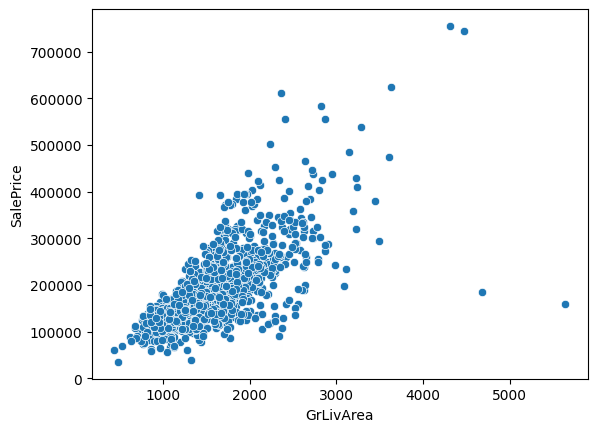

In [16]:
# plotting bivariate analysis SalePrice and GrLiveArea
sns.scatterplot(x=train["GrLivArea"], y=train["SalePrice"])

- two point of GrLivArea on right bottom are not following trend, so we will treat them as outlier and delete them
- the point on top are the the .7 something point however they are following the trend so we will keep them

In [17]:
# delete the outlier points from GrLivArea
train['GrLivArea'].sort_values(ascending = False)[:2]

1298    5642
523     4676
Name: GrLivArea, dtype: int64

In [18]:
train = train.drop(train[train['Id'] == 1299].index)
train = train.drop(train[train['Id'] == 524].index)

<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

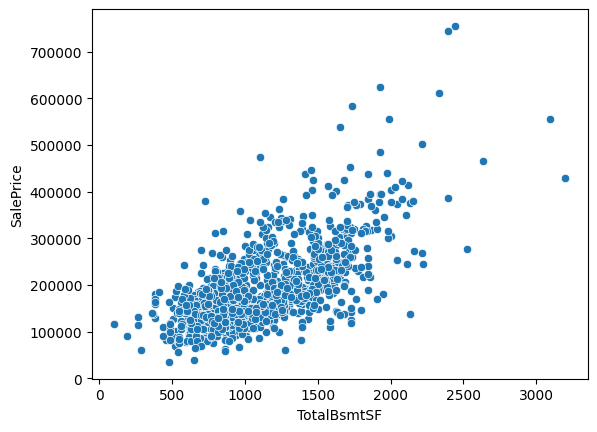

In [19]:
# plotting bivariate analysis SalePrice and TotalBsmtSF
sns.scatterplot(x=train["TotalBsmtSF"], y=train["SalePrice"])

- the points are almost following the trend so no need to drop any values

<Axes: xlabel='GarageArea', ylabel='SalePrice'>

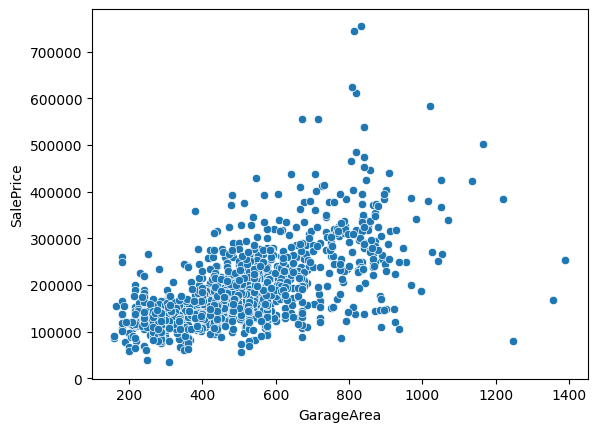

In [20]:
# plotting bivariate analysis SalePrice and GarageArea
sns.scatterplot(x=train["GarageArea"], y=train["SalePrice"])

- the points are almost following the trend so no need to drop any values

#### Checking Normality

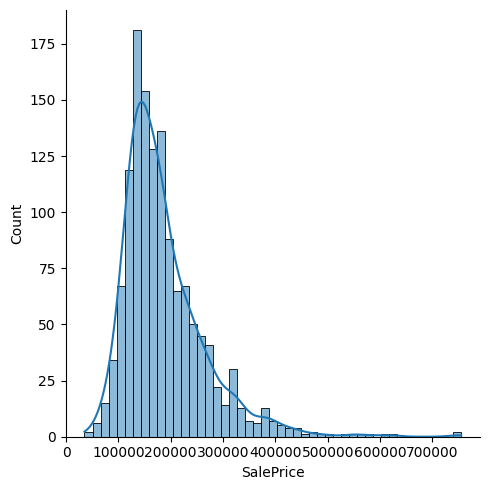

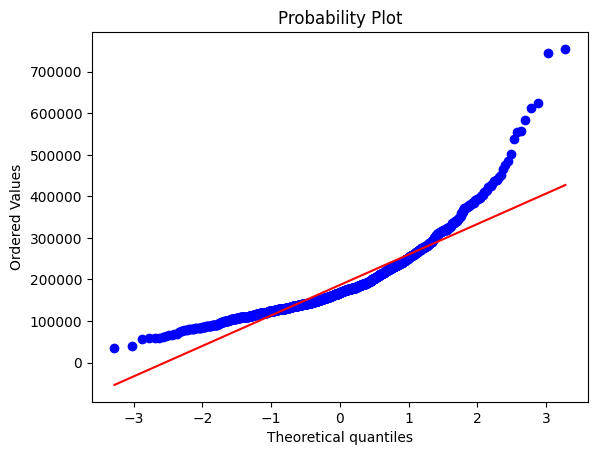

In [21]:
#histogram and normal probability plot
sns.displot(train['SalePrice'], kde=True);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

- there is postive skewness, we will use log transformation to convert it into normal distribution

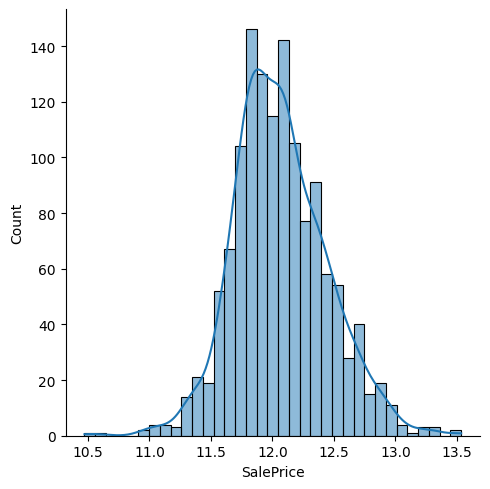

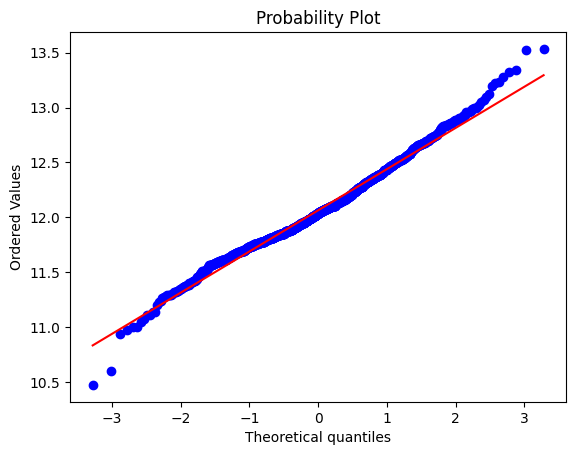

In [22]:
#applying log transformation
train['SalePrice'] = np.log(train['SalePrice'])
sns.displot(train['SalePrice'], kde=True);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

### Handle categorical values

In [23]:
# # checking unique values and datatype of remaining null value columns
object_cols = train.select_dtypes(include=['object'], exclude=['float64'])
# for i in object_cols:
#     print("{}:  {}".format(i, train[i].unique()))

In [24]:
# finding top 10 Neighborhood
train["Neighborhood"].value_counts().head(10)

Neighborhood
NAmes      209
CollgCr    146
OldTown    100
Somerst     83
Gilbert     77
NridgHt     75
NWAmes      73
Sawyer      69
Edwards     68
SawyerW     53
Name: count, dtype: int64

In [25]:
# # top 10 neigbhourhood in the train data
top_10=[i for i in train["Neighborhood"].value_counts().head(10).index]
top_10

['NAmes',
 'CollgCr',
 'OldTown',
 'Somerst',
 'Gilbert',
 'NridgHt',
 'NWAmes',
 'Sawyer',
 'Edwards',
 'SawyerW']

In [26]:
for i in top_10:
    train[i]=np.where(train["Neighborhood"]==i,1,0)  
train =  train.drop("Neighborhood", axis=1)

In [27]:
featured_train = train.drop(["SalePrice"], axis=1)

In [28]:
object_cols = featured_train.select_dtypes(include=['object'])
num_cols = featured_train.select_dtypes(include=['int64','float64']).columns

In [29]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

transformer = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore',sparse_output=False), ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition']))

In [30]:
# Transforming
transformed = transformer.fit_transform(featured_train)
# Transformating back
transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())
# One-hot encoding removed an index. Let's put it back:
transformed_df.index = featured_train.index
# Joining tables
featured_train = pd.concat([featured_train, transformed_df], axis=1)
# Dropping old categorical columns
featured_train.drop(object_cols, axis=1, inplace=True)
# CHecking result
featured_train.head()

,Id,LotFrontage,LotArea,OverallQual,YearBuilt,MasVnrArea,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,ScreenPorch,NAmes,CollgCr,OldTown,Somerst,Gilbert,NridgHt,NWAmes,Sawyer,Edwards,SawyerW,onehotencoder__MSZoning_C (all),onehotencoder__MSZoning_FV,onehotencoder__MSZoning_RH,onehotencoder__MSZoning_RL,onehotencoder__MSZoning_RM,onehotencoder__Street_Grvl,onehotencoder__Street_Pave,onehotencoder__LotShape_IR1,onehotencoder__LotShape_IR2,onehotencoder__LotShape_IR3,onehotencoder__LotShape_Reg,onehotencoder__LandContour_Bnk,onehotencoder__LandContour_HLS,onehotencoder__LandContour_Low,onehotencoder__LandContour_Lvl,onehotencoder__Utilities_AllPub,onehotencoder__Utilities_NoSeWa,onehotencoder__LotConfig_Corner,onehotencoder__LotConfig_CulDSac,onehotencoder__LotConfig_FR2,onehotencoder__LotConfig_FR3,onehotencoder__LotConfig_Inside,onehotencoder__LandSlope_Gtl,onehotencoder__LandSlope_Mod,onehotencoder__LandSlope_Sev,onehotencoder__Condition1_Artery,onehotencoder__Condition1_Feedr,onehotencoder__Condition1_Norm,onehotencoder__Condition1_PosA,onehotencoder__Condition1_PosN,onehotencoder__Condition1_RRAe,onehotencoder__Condition1_RRAn,onehotencoder__Condition1_RRNe,onehotencoder__Condition1_RRNn,onehotencoder__Condition2_Artery,onehotencoder__Condition2_Feedr,onehotencoder__Condition2_Norm,onehotencoder__Condition2_PosA,onehotencoder__Condition2_PosN,onehotencoder__Condition2_RRAe,onehotencoder__Condition2_RRAn,onehotencoder__Condition2_RRNn,onehotencoder__BldgType_1Fam,onehotencoder__BldgType_2fmCon,onehotencoder__BldgType_Duplex,onehotencoder__BldgType_Twnhs,onehotencoder__BldgType_TwnhsE,onehotencoder__HouseStyle_1.5Fin,onehotencoder__HouseStyle_1.5Unf,onehotencoder__HouseStyle_1Story,onehotencoder__HouseStyle_2.5Fin,onehotencoder__HouseStyle_2.5Unf,onehotencoder__HouseStyle_2Story,onehotencoder__HouseStyle_SFoyer,onehotencoder__HouseStyle_SLvl,onehotencoder__RoofStyle_Flat,onehotencoder__RoofStyle_Gable,onehotencoder__RoofStyle_Gambrel,onehotencoder__RoofStyle_Hip,onehotencoder__RoofStyle_Mansard,onehotencoder__RoofStyle_Shed,onehotencoder__RoofMatl_CompShg,onehotencoder__RoofMatl_Membran,onehotencoder__RoofMatl_Metal,onehotencoder__RoofMatl_Roll,onehotencoder__RoofMatl_Tar&Grv,onehotencoder__RoofMatl_WdShake,onehotencoder__RoofMatl_WdShngl,onehotencoder__Exterior1st_AsbShng,onehotencoder__Exterior1st_BrkComm,onehotencoder__Exterior1st_BrkFace,onehotencoder__Exterior1st_CBlock,onehotencoder__Exterior1st_CemntBd,onehotencoder__Exterior1st_HdBoard,onehotencoder__Exterior1st_ImStucc,onehotencoder__Exterior1st_MetalSd,onehotencoder__Exterior1st_Plywood,onehotencoder__Exterior1st_Stone,onehotencoder__Exterior1st_Stucco,onehotencoder__Exterior1st_VinylSd,onehotencoder__Exterior1st_Wd Sdng,onehotencoder__Exterior1st_WdShing,onehotencoder__Exterior2nd_AsbShng,onehotencoder__Exterior2nd_AsphShn,onehotencoder__Exterior2nd_Brk Cmn,onehotencoder__Exterior2nd_BrkFace,onehotencoder__Exterior2nd_CBlock,onehotencoder__Exterior2nd_CmentBd,onehotencoder__Exterior2nd_HdBoard,onehotencoder__Exterior2nd_ImStucc,onehotencoder__Exterior2nd_MetalSd,onehotencoder__Exterior2nd_Other,onehotencoder__Exterior2nd_Plywood,onehotencoder__Exterior2nd_Stone,onehotencoder__Exterior2nd_Stucco,onehotencoder__Exterior2nd_VinylSd,onehotencoder__Exterior2nd_Wd Sdng,onehotencoder__Exterior2nd_Wd Shng,onehotencoder__ExterQual_Ex,onehotencoder__ExterQual_Fa,onehotencoder__ExterQual_Gd,onehotencoder__ExterQual_TA,onehotencoder__ExterCond_Ex,onehotencoder__ExterCond_Fa,onehotencoder__ExterCond_Gd,onehotencoder__ExterCond_TA,onehotencoder__Foundation_BrkTil,onehotencoder__Foundation_CBlock,onehotencoder__Foundation_PConc,onehotencoder__Foundation_Stone,onehotencoder__Foundation_Wood,onehotencoder__BsmtQual_Ex,onehotencoder__BsmtQual_Fa,onehotencoder__BsmtQual_Gd,onehotencoder__BsmtQual_TA,onehotencoder__BsmtCond_Fa,onehotencoder__BsmtCond_Gd,onehotencoder__BsmtCond_Po,onehotencoder__BsmtCond

### TEST DATASET

In [31]:
# read dataset
test = pd.read_csv("test.csv")

In [32]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [33]:
# we will drop these features which are not affecting our house sale price
test = test.drop(["MSSubClass","OverallCond","BsmtFinSF2","LowQualFinSF","BsmtHalfBath","KitchenAbvGr","EnclosedPorch","3SsnPorch","PoolArea","MiscVal","MoSold","YrSold",
                     "GarageYrBlt","YearRemodAdd","BsmtFinSF1","1stFlrSF","TotRmsAbvGrd","GarageCars"],axis = 1)

In [34]:
# checking null values and its percentage in every col
test.isnull().mean().sort_values(ascending=False)*100

PoolQC           99.794380
MiscFeature      96.504455
Alley            92.666210
Fence            80.123372
MasVnrType       61.274846
FireplaceQu      50.034270
LotFrontage      15.558602
GarageFinish      5.346127
GarageCond        5.346127
GarageQual        5.346127
GarageType        5.209047
BsmtCond          3.084304
BsmtExposure      3.015764
BsmtQual          3.015764
BsmtFinType1      2.878684
BsmtFinType2      2.878684
MasVnrArea        1.028101
MSZoning          0.274160
BsmtFullBath      0.137080
Functional        0.137080
Utilities         0.137080
TotalBsmtSF       0.068540
BsmtUnfSF         0.068540
Exterior1st       0.068540
Exterior2nd       0.068540
KitchenQual       0.068540
SaleType          0.068540
GarageArea        0.068540
HalfBath          0.000000
FullBath          0.000000
Fireplaces        0.000000
BedroomAbvGr      0.000000
2ndFlrSF          0.000000
PavedDrive        0.000000
WoodDeckSF        0.000000
OpenPorchSF       0.000000
ScreenPorch       0.000000
G

In [35]:
# Handles null values 

# dropping "PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu" column  as it has null values more than 25%
test = test.drop(["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu", "MasVnrType", ],axis = 1)

for column in test.columns:
    if test[column].dtype == 'object':  # For categorical columns
        mode_value = test[column].mode()[0]  # Get the most frequent value (mode)
        test[column].fillna(mode_value, inplace=True)
    else:  # For numerical columns
        median_value = test[column].median()  # Get the median value
        test[column].fillna(median_value, inplace=True)

In [36]:
# test.isnull().mean()*100

In [37]:
# Handling categorical values
for i in top_10:
    test[i]=np.where(test["Neighborhood"]==i,1,0)  
test =  test.drop("Neighborhood", axis=1)

# Transforming
transformed = transformer.transform(test)
# Transformating back
transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())
# One-hot encoding removed an index. Let's put it back:
transformed_df.index = test.index
# Joining tables
test = pd.concat([test, transformed_df], axis=1)
# Dropping old categorical columns
test.drop(object_cols, axis=1, inplace=True)
# CHecking result
test.head()

,Id,LotFrontage,LotArea,OverallQual,YearBuilt,MasVnrArea,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,ScreenPorch,NAmes,CollgCr,OldTown,Somerst,Gilbert,NridgHt,NWAmes,Sawyer,Edwards,SawyerW,onehotencoder__MSZoning_C (all),onehotencoder__MSZoning_FV,onehotencoder__MSZoning_RH,onehotencoder__MSZoning_RL,onehotencoder__MSZoning_RM,onehotencoder__Street_Grvl,onehotencoder__Street_Pave,onehotencoder__LotShape_IR1,onehotencoder__LotShape_IR2,onehotencoder__LotShape_IR3,onehotencoder__LotShape_Reg,onehotencoder__LandContour_Bnk,onehotencoder__LandContour_HLS,onehotencoder__LandContour_Low,onehotencoder__LandContour_Lvl,onehotencoder__Utilities_AllPub,onehotencoder__Utilities_NoSeWa,onehotencoder__LotConfig_Corner,onehotencoder__LotConfig_CulDSac,onehotencoder__LotConfig_FR2,onehotencoder__LotConfig_FR3,onehotencoder__LotConfig_Inside,onehotencoder__LandSlope_Gtl,onehotencoder__LandSlope_Mod,onehotencoder__LandSlope_Sev,onehotencoder__Condition1_Artery,onehotencoder__Condition1_Feedr,onehotencoder__Condition1_Norm,onehotencoder__Condition1_PosA,onehotencoder__Condition1_PosN,onehotencoder__Condition1_RRAe,onehotencoder__Condition1_RRAn,onehotencoder__Condition1_RRNe,onehotencoder__Condition1_RRNn,onehotencoder__Condition2_Artery,onehotencoder__Condition2_Feedr,onehotencoder__Condition2_Norm,onehotencoder__Condition2_PosA,onehotencoder__Condition2_PosN,onehotencoder__Condition2_RRAe,onehotencoder__Condition2_RRAn,onehotencoder__Condition2_RRNn,onehotencoder__BldgType_1Fam,onehotencoder__BldgType_2fmCon,onehotencoder__BldgType_Duplex,onehotencoder__BldgType_Twnhs,onehotencoder__BldgType_TwnhsE,onehotencoder__HouseStyle_1.5Fin,onehotencoder__HouseStyle_1.5Unf,onehotencoder__HouseStyle_1Story,onehotencoder__HouseStyle_2.5Fin,onehotencoder__HouseStyle_2.5Unf,onehotencoder__HouseStyle_2Story,onehotencoder__HouseStyle_SFoyer,onehotencoder__HouseStyle_SLvl,onehotencoder__RoofStyle_Flat,onehotencoder__RoofStyle_Gable,onehotencoder__RoofStyle_Gambrel,onehotencoder__RoofStyle_Hip,onehotencoder__RoofStyle_Mansard,onehotencoder__RoofStyle_Shed,onehotencoder__RoofMatl_CompShg,onehotencoder__RoofMatl_Membran,onehotencoder__RoofMatl_Metal,onehotencoder__RoofMatl_Roll,onehotencoder__RoofMatl_Tar&Grv,onehotencoder__RoofMatl_WdShake,onehotencoder__RoofMatl_WdShngl,onehotencoder__Exterior1st_AsbShng,onehotencoder__Exterior1st_BrkComm,onehotencoder__Exterior1st_BrkFace,onehotencoder__Exterior1st_CBlock,onehotencoder__Exterior1st_CemntBd,onehotencoder__Exterior1st_HdBoard,onehotencoder__Exterior1st_ImStucc,onehotencoder__Exterior1st_MetalSd,onehotencoder__Exterior1st_Plywood,onehotencoder__Exterior1st_Stone,onehotencoder__Exterior1st_Stucco,onehotencoder__Exterior1st_VinylSd,onehotencoder__Exterior1st_Wd Sdng,onehotencoder__Exterior1st_WdShing,onehotencoder__Exterior2nd_AsbShng,onehotencoder__Exterior2nd_AsphShn,onehotencoder__Exterior2nd_Brk Cmn,onehotencoder__Exterior2nd_BrkFace,onehotencoder__Exterior2nd_CBlock,onehotencoder__Exterior2nd_CmentBd,onehotencoder__Exterior2nd_HdBoard,onehotencoder__Exterior2nd_ImStucc,onehotencoder__Exterior2nd_MetalSd,onehotencoder__Exterior2nd_Other,onehotencoder__Exterior2nd_Plywood,onehotencoder__Exterior2nd_Stone,onehotencoder__Exterior2nd_Stucco,onehotencoder__Exterior2nd_VinylSd,onehotencoder__Exterior2nd_Wd Sdng,onehotencoder__Exterior2nd_Wd Shng,onehotencoder__ExterQual_Ex,onehotencoder__ExterQual_Fa,onehotencoder__ExterQual_Gd,onehotencoder__ExterQual_TA,onehotencoder__ExterCond_Ex,onehotencoder__ExterCond_Fa,onehotencoder__ExterCond_Gd,onehotencoder__ExterCond_TA,onehotencoder__Foundation_BrkTil,onehotencoder__Foundation_CBlock,onehotencoder__Foundation_PConc,onehotencoder__Foundation_Stone,onehotencoder__Foundation_Wood,onehotencoder__BsmtQual_Ex,onehotencoder__BsmtQual_Fa,onehotencoder__BsmtQual_Gd,onehotencoder__BsmtQual_TA,onehotencoder__BsmtCond_Fa,onehotencoder__BsmtCond_Gd,onehotencoder__BsmtCond_Po,onehotencoder__BsmtCond

In [38]:
test.shape, featured_train.shape

((1459, 228), (1336, 228))

In [39]:
# # Standardization
# # We try to bring all the variables or features to a similar scale. standarisation means centering the variable at zero.
# # z=(x-x_mean)/std
# from sklearn.preprocessing import StandardScaler

# # for train dataset
# scaler=StandardScaler()
# train_scaled =scaler.fit_transform(featured_train)

# # for test dataset
# test_scaled =scaler.transform(test)

In [40]:
from sklearn.preprocessing import MinMaxScaler

# for train dataset
min_max=MinMaxScaler()
train_scaled =min_max.fit_transform(featured_train)

# for test dataset
test_scaled =min_max.transform(test)

### Building Model

In [41]:
feature = train_scaled
target = train["SalePrice"]
feature.shape, target.shape

((1336, 228), (1336,))

In [42]:
# splitting dataset into training and validating dataset
from sklearn.model_selection import train_test_split

feature_train, feature_val, target_train, target_val = train_test_split(feature, target, test_size=0.2)

#### Linear Regression

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

LR = LinearRegression()
linear_model = LR.fit(feature_train, target_train)

In [44]:
# R value
print("R squared value:", LR.score(feature_train, target_train))

R squared value: 0.9352366629319417


In [45]:
# calculating RMSE value
from sklearn.metrics import mean_squared_error

pred = linear_model.predict(feature_val)
regression_model_mse = mean_squared_error(pred, target_val)
print("MSE: ", regression_model_mse)
print("RMSE: ", np.sqrt(regression_model_mse))

MSE:  1.7402827338053704e+18
RMSE:  1319197761.4464672


In [46]:
# getting slope / b1 value after model fit
print(linear_model.coef_[0])
# getting intercept / b0 value after model fit
print(linear_model.intercept_)

-0.010378077043207642
-74593079367.46141


<Axes: xlabel='SalePrice'>

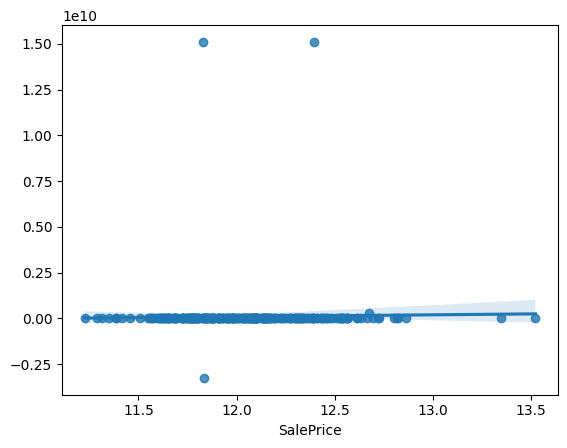

In [47]:
# visualise dataset
import seaborn as sns
sns.regplot(x=target_val, y=pred)

#### Decision Tree Regression

In [48]:
from sklearn.tree import DecisionTreeRegressor

DecisionTreeRegressor_model=DecisionTreeRegressor(criterion='absolute_error',splitter='best',max_depth=None,min_samples_split=2,min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    ccp_alpha=0.0)

decisionTree_model = DecisionTreeRegressor_model.fit(feature_train, target_train)

# R value
print("R squared value:", decisionTree_model.score(feature_train, target_train))

R squared value: 1.0


In [49]:
# calculating RMSE value

pred_decisionTree = decisionTree_model.predict(feature_val)
decisionTree_model_mse = mean_squared_error(pred_decisionTree, target_val)
print("MSE: ", decisionTree_model_mse)
print("RMSE: ", np.sqrt(decisionTree_model_mse))

MSE:  0.04359402359957413
RMSE:  0.20879181880421974


### Random Forest

In [50]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor()
rf_model = regressor.fit(feature_train, target_train)

#  R value
print("R squared value:", rf_model.score(feature_train, target_train))

R squared value: 0.9792859804031795


#### XG Boost

In [51]:
from xgboost import XGBRegressor
XGB = XGBRegressor(n_estimators=35,max_depth=7,min_child_weight=1,subsample=1,colsample_bytree=1,
                   learning_rate=0.18)

XGB_model= XGB.fit(feature_train, target_train)
#  R value
print("R squared value:", XGB_model.score(feature_train, target_train))

R squared value: 0.9955360160784568


In [52]:
# calculating RMSE value

pred_XGB = XGB_model.predict(feature_val)
XGB_model_mse = mean_squared_error(pred_XGB, target_val)
print("MSE: ", XGB_model_mse)
print("RMSE: ", np.sqrt(XGB_model_mse))

MSE:  0.013373917141889938
RMSE:  0.11564565336358275


#### CatBoost

In [53]:
from catboost import CatBoostRegressor
cat = CatBoostRegressor(iterations=100, learning_rate=0.1, random_seed=42)

CAT_model = cat.fit(feature_train, target_train)
#  R value
print("R squared value:", CAT_model.score(feature_train, target_train))

0:	learn: 0.3622158	total: 145ms	remaining: 14.4s
1:	learn: 0.3407036	total: 153ms	remaining: 7.49s
2:	learn: 0.3197507	total: 160ms	remaining: 5.18s
3:	learn: 0.3034690	total: 168ms	remaining: 4.03s
4:	learn: 0.2863692	total: 175ms	remaining: 3.33s
5:	learn: 0.2708026	total: 183ms	remaining: 2.86s
6:	learn: 0.2583459	total: 190ms	remaining: 2.52s
7:	learn: 0.2468855	total: 198ms	remaining: 2.27s
8:	learn: 0.2357382	total: 206ms	remaining: 2.08s
9:	learn: 0.2246131	total: 213ms	remaining: 1.92s
10:	learn: 0.2157275	total: 221ms	remaining: 1.79s
11:	learn: 0.2068753	total: 228ms	remaining: 1.67s
12:	learn: 0.1994501	total: 236ms	remaining: 1.58s
13:	learn: 0.1924576	total: 242ms	remaining: 1.49s
14:	learn: 0.1864373	total: 250ms	remaining: 1.41s
15:	learn: 0.1807897	total: 257ms	remaining: 1.35s
16:	learn: 0.1759677	total: 264ms	remaining: 1.29s
17:	learn: 0.1715508	total: 272ms	remaining: 1.24s
18:	learn: 0.1669443	total: 280ms	remaining: 1.19s
19:	learn: 0.1626165	total: 287ms	remaini

In [54]:
# calculating RMSE value

pred_CAT = CAT_model.predict(feature_val)
CAT_model_mse = mean_squared_error(pred_CAT, target_val)
print("MSE: ", CAT_model_mse)
print("RMSE: ", np.sqrt(CAT_model_mse))

MSE:  0.010237236148284545
RMSE:  0.10117922784981384


#### Ridge

In [55]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

ridge = Ridge(alpha=1.0)
ridge_model = ridge.fit(feature_train, target_train)

#  R value
print("R squared value:", ridge_model.score(feature_train, target_train))

R squared value: 0.9316150710350981


In [56]:
# calculating RMSE value

pred_ridge = ridge_model.predict(feature_val)
ridge_model_mse = mean_squared_error(pred_ridge, target_val)
print("MSE: ", ridge_model_mse)
print("RMSE: ", np.sqrt(ridge_model_mse))

MSE:  0.011654220990315807
RMSE:  0.10795471731386178


#### Lasso

In [57]:
lasso = Lasso(alpha=1.0)
lasso_model = lasso.fit(feature_train, target_train)

#  R value
print("R squared value:", lasso_model.score(feature_train, target_train))

R squared value: 0.0


In [58]:
# calculating RMSE value

pred_lasso = lasso_model.predict(feature_val)
lasso_model_mse = mean_squared_error(pred_lasso, target_val)
print("MSE: ", lasso_model_mse)
print("RMSE: ", np.sqrt(lasso_model_mse))

MSE:  0.11640284386798078
RMSE:  0.3411786099215201


### Support Vector Machine

### Generating Result on test data

In [59]:
# generates the csv prediction file 
def generate_result(model, test_data_input, file_name):
    predictions = np.exp(model.predict(test_data_input))
    results = pd.DataFrame({"Id":  test["Id"], "SalePrice": predictions})
    results.to_csv(file_name + ".csv", index=False)


In [60]:
generate_result(linear_model, test_scaled, "Linear_regression")
generate_result(decisionTree_model, test_scaled, "DecisionTree")
generate_result(XGB_model, test_scaled, "XGB")
generate_result(CAT_model, test_scaled,"CAT")
generate_result(ridge_model, test_scaled, "ridge")
generate_result(lasso_model, test_scaled, "lasso")
# generate_result(svm_model, test_scaled, "SVM")
# generate_result(svm_grid, test_scaled, "SVM GridSearchCV")
generate_result(rf_model, test_scaled, "Random forest")
# generate_result(rf_grid, test_scaled, "Random Forest GridSearchCV")